# KNN Model Analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

pd.plotting.register_matplotlib_converters()

In [2]:
# Function is used to randomly reduce a dataset's sample size
# Returns a df that is reduced_size % the size of the original dataset
# ====================================================================
# reduced_size: A percentage in range [0,1] that represents ratio of reduced size to the original (redice/original)
# df: the df that will be reduced

def reduce_df(reduced_size, df):
    if reduced_size >= 0 and reduced_size <= 1:
        n = df.shape[0]
        num_drop = int(n * (1-reduced_size))
        n_list = [i for i in range(n)]
        np.random.shuffle(n_list)
        drop_list = n_list[0:num_drop]
        return df.drop(drop_list)
    
    else:
        print('NO SAMPLES REMOVED!\nEnter a valid reduction percentage in range [0,1]\n')
        return df

In [3]:
df_train = pd.read_csv('../heartECG_data/mitbih_train.csv')
n_orig = df_train.shape[0]
df_train = reduce_df(0.6,df_train) #shrink df by 60% of it's original size (# samples)
n_new = df_train.shape[0]
n_change = n_orig - n_new
n_change_percent = round(n_new/n_orig,2)

print('Orig # samples:', n_orig)
print('New # samples:', n_new)
print('# samples removed:', n_change)
print('Removed Ratio (should equal reduced_size param):', n_change_percent)

Orig # samples: 87553
New # samples: 52532
# samples removed: 35021
Removed Ratio (should equal reduced_size param): 0.6


In [4]:
cols = [i for i in range(188)]
df_train.columns = cols
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.423611,0.791667,1.000000,0.256944,0.000000,0.277778,0.465278,0.520833,0.472222,0.555556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.716814,0.539823,0.283186,0.129794,0.064897,0.076696,0.026549,0.032448,0.008850,0.044248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.874214,0.849057,0.480084,0.058700,0.090147,0.310273,0.387841,0.385744,0.389937,0.392034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X = df_train.iloc[:,0:-1]
y = df_train.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('# training samples:', X_train.shape[0])
print('# test samples:', X_test.shape[0])

# training samples: 42025
# test samples: 10507


In [6]:
num_neigh = [i for i in range(1,13)]
scores = []
for k in num_neigh:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    score = accuracy_score(y_test, y_hat)
    scores.append(score)
    print('# neighbors:', k)
    print('accuracy:', score)
    print('======================================')

# neighbors: 1
accuracy: 0.977158085086133
# neighbors: 2
accuracy: 0.9750642428856953
# neighbors: 3
accuracy: 0.9756352907585419
# neighbors: 4
accuracy: 0.9741124964309508
# neighbors: 5
accuracy: 0.9735414485581041
# neighbors: 6
accuracy: 0.9717331302940897
# neighbors: 7
accuracy: 0.971162082421243
# neighbors: 8
accuracy: 0.9704958599029219
# neighbors: 9
accuracy: 0.9695441134481774
# neighbors: 10
accuracy: 0.9691634148662797
# neighbors: 11
accuracy: 0.9689730655753307
# neighbors: 12
accuracy: 0.9681164937660607


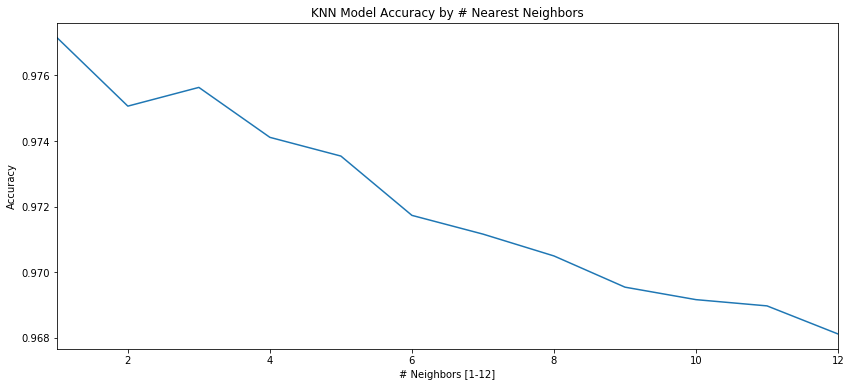

In [19]:
plt.figure(figsize=(14,6))

plt.xlabel('# Neighbors [1-12]')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy by # Nearest Neighbors')

ax = plt.gca()
ax.set_xlim([1, 12])

plt.plot(num_neigh,scores)
plt.show()